## T2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


df = pd.read_excel(r"DATA/T2.xlsx")


In [3]:
df

,f1 (MHz),f2 (MHz),T1 (us),deltaT (us),pulse echo (mV),Unnamed: 5,SCALE (mV/div)
0,24.3077,24.344,200.0,3000,61.7,NaN,10.0
1,NaN,NaN,NaN,3700,61.3,NaN,NaN
2,NaN,NaN,NaN,4500,60.8,NaN,NaN
3,NaN,NaN,NaN,5000,60.0,NaN,NaN
4,NaN,NaN,NaN,5700,59.7,NaN,NaN
5,NaN,NaN,NaN,8700,56.0,NaN,NaN
6,NaN,NaN,NaN,10800,52.3,NaN,NaN
7,NaN,NaN,NaN,13400,48.5,NaN,NaN
8,NaN,NaN,NaN,16600,40.7,NaN,NaN
9,NaN,NaN,NaN,20600,37.0,NaN,NaN


In [4]:
x = np.array(df["deltaT (us)"])
y = np.array(df["pulse echo (mV)"])

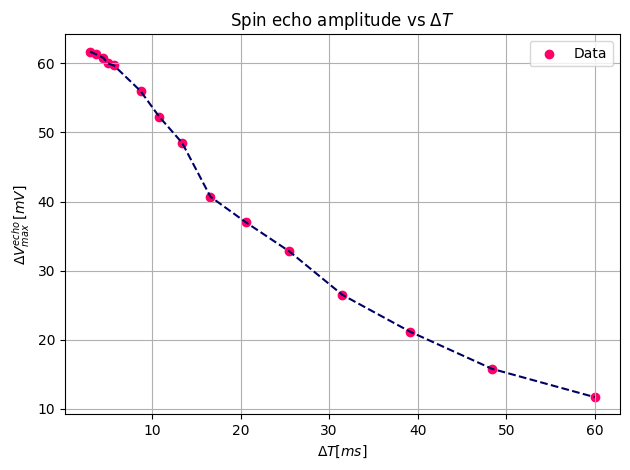

In [5]:
# Plotting the results
plt.scatter(x/1000, y ,color="#FF0066", label="Data", marker='o')
plt.plot(x/1000, y, color="#000066", linestyle='dashed')
# Adding shaded region for uncertainty (±1 sigma)
#plt.fill_between(X, (q - sigma_q) + slope * X, (q + sigma_q) + slope * X, color='lightblue', alpha=0.5, label="$\pm 1\sigma$")

# Adding labels and legend
plt.title('Spin echo amplitude vs $\Delta T$')
plt.xlabel('$\Delta T [ms]$')
plt.ylabel('$\Delta V_{max}^{echo} \, [mV] $')
plt.legend()
plt.grid()
plt.tight_layout()
# Displaying the plot
plt.show()

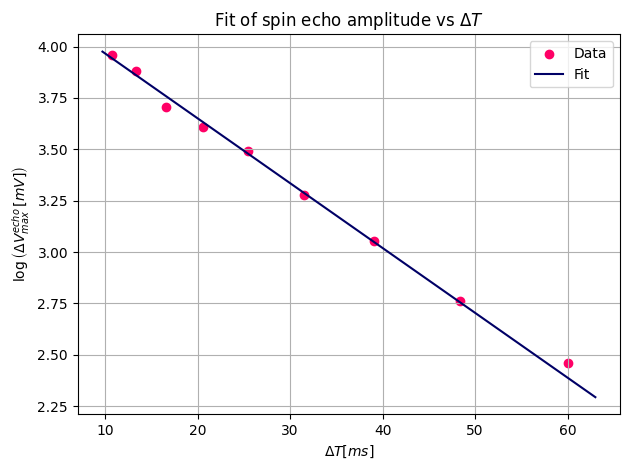

In [6]:
# Extracting data for fitting
x_fit = x[6:]/1000
y_fit = y[6:]

# Linearizing the data
y_lin = np.log(y_fit)

# Calculating errors
yerr = (1 / y_fit) * (10 / (10 * np.sqrt(6)))

# Fitting the data with a linear model
def linear_model(x, m, q):
    return m * x + q

popt, pcov = curve_fit(linear_model, x_fit, y_lin, sigma=yerr, absolute_sigma=True)
slope, q = popt
sigma_slope, sigma_q = np.sqrt(np.diag(pcov))

# Plotting the results
plt.scatter(x_fit, y_lin ,color="#FF0066", label="Data")
X = np.linspace(min(x_fit) * 0.9, max(x_fit) * 1.05, 50)
plt.plot(X, q + slope * X, color="#000066", label="Fit")
# Adding shaded region for uncertainty (±1 sigma)
#plt.fill_between(X, (q - sigma_q) + slope * X, (q + sigma_q) + slope * X, color='lightblue', alpha=0.5, label="$\pm 1\sigma$")

# Adding labels and legend
plt.title('Fit of spin echo amplitude vs $\Delta T$')
plt.xlabel('$\Delta T [ms]$')
plt.ylabel('$\log\left( \Delta V_{max}^{echo} \, [mV] \\right)$')
plt.legend()
plt.grid()
plt.tight_layout()
# Displaying the plot
plt.show()

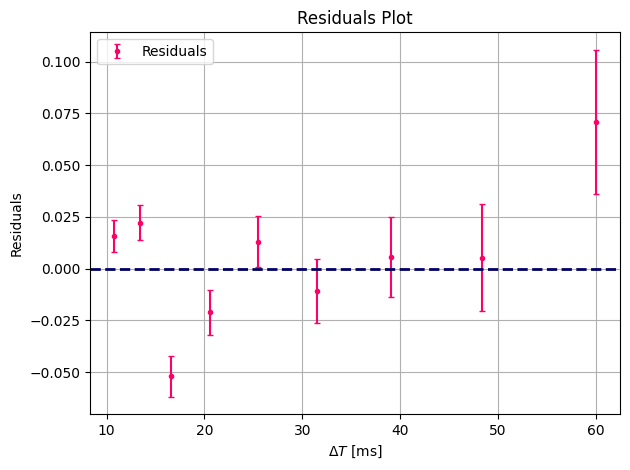

In [7]:
# Calculating residuals
residuals = y_lin - (q + slope * x_fit)

# Plotting residuals
plt.errorbar(x_fit, residuals, yerr=yerr, color="#FF0066", fmt=".", label="Residuals", capsize=2)
plt.axhline(y=0, color='#000066', linestyle='--', linewidth=2)  # Adding a horizontal line at y=0 for reference
plt.xlabel('$\Delta T$ [ms]')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [8]:
T2 = -1/slope
err = (1/(slope**2))*sigma_slope
print("T2: ", T2,  "ms +- ", err)




T2:  31.68705565031238 ms +-  0.39939030916636603


In [10]:
slope, q

(-0.031558627946870844, 4.282168165540889)

In [9]:
sigma_slope, sigma_q

(0.0003977715794002088, 0.0085359561209864)